# Spearman's correlation Coefficients( SNAKCS data)
### ProjectId: 04, GroupId: 64
### Nikil Raghute(16AG36015)

In [1]:
# importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os
os.chdir('C:\\Users\\Nikhil\\Desktop')

In [3]:
#Loading .xls file into DataFrame
data = pd.read_excel("./SNACKS.xls") 
#data = pd.DataFrame(data)

In [4]:
data.to_csv("SNACKS.csv", index = False)

In [5]:
# Printing first 5 rows from the data
data.head()

,Liking scores,Saltiness,Sweetness,Acidity,Crunchiness
0,1,3,3,3,3
1,1,1,2,3,1
2,1,2,2,5,1
3,1,1,4,3,1
4,2,3,3,2,2


In [6]:
# Plotting scatter plots of different features vs target variable

Text(0, 0.5, 'Liking scores')

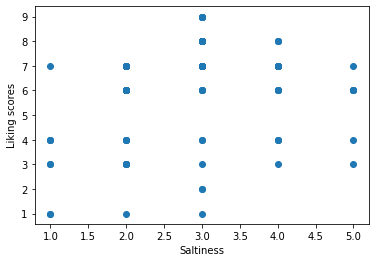

In [7]:
plt.scatter(data["Saltiness"], data["Liking scores"])
plt.xlabel("Saltiness")
plt.ylabel("Liking scores")

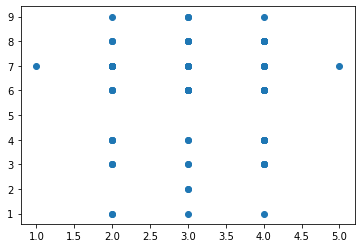

In [8]:
plt.scatter(data["Sweetness"], data["Liking scores"])

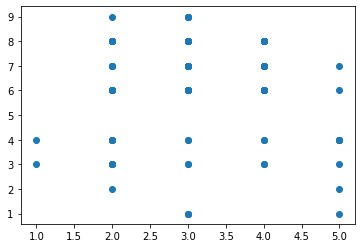

In [9]:
plt.scatter(data["Acidity"], data["Liking scores"])

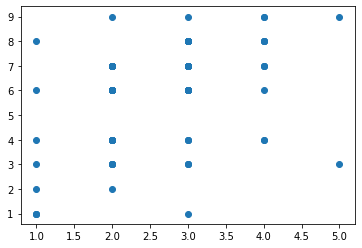

In [10]:
plt.scatter(data["Crunchiness"], data["Liking scores"])

In [11]:
# As the data is scattered in very complex way, it's difficult to find any correlation between features and target variable

In [12]:
# We can calculate Spearman's correlation coefficients among all possible pairs of attributes
ans = [[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0]]
lis = ["Liking scores", "Saltiness", "Sweetness", "Acidity", "Crunchiness"]
i = 0
j = 0

def func(lis):
    i = 0
    for x in lis:
        j = 0
        for y in lis:
            d1 = pd.DataFrame()
            d1[x] = data[x]
            d1[y] = data[y]
            d1["r1"] = d1[x].rank(ascending = False)
            d1["r2"] = d1[y].rank(ascending = False)
            d1["diff"] = d1["r1"] - d1["r2"]
            d1["diff2"] = d1["diff"]**2
            d2s = d1["diff2"].sum()
            n = 100
            rs = 1 - ((6*d2s)/(n*(n**2-1)))
            ans[i][j] = rs
            j = j + 1
        i = i + 1
    return ans

In [13]:
mat = func(lis)
mat = pd.DataFrame(mat, index = lis, columns = lis)
mat

,Liking scores,Saltiness,Sweetness,Acidity,Crunchiness
Liking scores,1.000000,0.319130,0.101599,0.031476,0.509529
Saltiness,0.319130,1.000000,-0.006757,0.022190,0.211491
Sweetness,0.101599,-0.006757,1.000000,-0.098605,0.049244
Acidity,0.031476,0.022190,-0.098605,1.000000,0.250573
Crunchiness,0.509529,0.211491,0.049244,0.250573,1.000000


In [14]:
# Pearson's correlation coefficient matrix
data.corr()

,Liking scores,Saltiness,Sweetness,Acidity,Crunchiness
Liking scores,1.000000,0.280465,0.031249,-0.063211,0.438298
Saltiness,0.280465,1.000000,-0.124927,-0.100368,0.065241
Sweetness,0.031249,-0.124927,1.000000,-0.237212,-0.068730
Acidity,-0.063211,-0.100368,-0.237212,1.000000,0.132331
Crunchiness,0.438298,0.065241,-0.068730,0.132331,1.000000


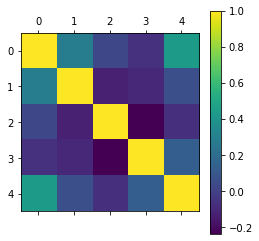

In [15]:
plt.matshow(data.corr())
plt.colorbar()
plt.show()

In [16]:
# Spearman's correlation matrix using spearmanr()
from scipy.stats import spearmanr
spearmanr(data)[0]

array([[ 1.        ,  0.27220415,  0.02989934, -0.03451333,  0.46590771],
       [ 0.27220415,  1.        , -0.12160131, -0.07715498,  0.11290395],
       [ 0.02989934, -0.12160131,  1.        , -0.22275703, -0.08096516],
       [-0.03451333, -0.07715498, -0.22275703,  1.        ,  0.15770467],
       [ 0.46590771,  0.11290395, -0.08096516,  0.15770467,  1.        ]])

In [17]:
# But we've to calculate rs only for features-target pairs, we can use it from the "mat",
# but for simplification and details, we can calculate it again one by one

In [18]:
# list of all four Spearman's correlation coefficients for different pairs in the data
Rs = []      # empty list is declared

In [19]:
from scipy.stats import pearsonr
pearsonr(data["Saltiness"], data["Liking scores"])

(0.28046458735062796, 0.0047082559744388314)

## Spearman's correlation Coefficient for Saltiness- Liking scores

In [20]:
# Calculating Spearman's correlation coefficient(rs) for Saltiness- liking scores pair
saltCorr = pd.DataFrame()
saltCorr["Saltiness"] = data["Saltiness"]
saltCorr["Salt r"] = saltCorr["Saltiness"].rank(ascending = False)   # rank for "Saltiness" attribute
saltCorr["Liking scores"] = data["Liking scores"]
saltCorr["Liking scores r"] = saltCorr["Liking scores"].rank(ascending = False)   # rank for "Liking scores" attribute
saltCorr["diff"] = saltCorr["Salt r"] - saltCorr["Liking scores r"]     # difference between their ranks
saltCorr["diff2"] = saltCorr["diff"]**2      # Square of difference between ranks of two attributes

In [21]:
# Printing first 5 rows of the table used for calculating rs
saltCorr.head()

,Saltiness,Salt r,Liking scores,Liking scores r,diff,diff2
0,3,46.0,1,98.5,-52.5,2756.25
1,1,96.5,1,98.5,-2.0,4.00
2,2,79.5,1,98.5,-19.0,361.00
3,1,96.5,1,98.5,-2.0,4.00
4,3,46.0,2,95.5,-49.5,2450.25


In [22]:
# d2 is the sum of square of difference between ranks of two attributes
d2 = saltCorr["diff2"].sum()
print(d2)

113467.0


In [23]:
# n = no. of objects(rows)
n = len(saltCorr.index)
print(n)

100


In [24]:
# By using formula rs = 1-((6*∑di^2)/(n^2(n-1)))
rs = 1 - ((6*d2)/(n**3 - n))
print(rs)

0.3191299129912991


In [25]:
Rs.append(rs)    # rs for the Saltiness- Liking scores pair is appended in Rs list  

## Spearman's correlation Coefficient for Sweetness- Liking scores

In [26]:
# Similarly for all other pairs of attributes

# For Sweetness- Liking scores
sweetCorr = pd.DataFrame()
sweetCorr["Sweetness"] = data["Sweetness"]
sweetCorr["Sweet r"] = sweetCorr["Sweetness"].rank(ascending = False)
sweetCorr["Liking scores"] = data["Liking scores"]
sweetCorr["Liking scores r"] = sweetCorr["Liking scores"].rank(ascending = False)
sweetCorr["diff"] = sweetCorr["Sweet r"] - sweetCorr["Liking scores r"]  
sweetCorr["diff2"] = sweetCorr["diff"]**2

In [27]:
print(sweetCorr.head())

   Sweetness  Sweet r  Liking scores  Liking scores r  diff    diff2
0          3     56.5              1             98.5 -42.0  1764.00
1          2     86.0              1             98.5 -12.5   156.25
2          2     86.0              1             98.5 -12.5   156.25
3          4     21.0              1             98.5 -77.5  6006.25
4          3     56.5              2             95.5 -39.0  1521.00


In [28]:
d2 = sweetCorr["diff2"].sum()
print(d2)

149718.5


In [29]:
n = len(sweetCorr.index)
print(n)

100


In [30]:
rs = 1 - ((6*d2)/(n**3 - n))
print(rs)

0.10159915991599155


In [31]:
Rs.append(rs)

## Spearman's correlation Coefficient for Acidity- Liking scores

In [32]:
# For  Acidity- Liking scores  
acidCorr = pd.DataFrame()
acidCorr["Acidity"] = data["Acidity"]
acidCorr["Acid r"] = acidCorr["Acidity"].rank(ascending = False)
acidCorr["Liking scores"] = data["Liking scores"]
acidCorr["Liking scores r"] = acidCorr["Liking scores"].rank(ascending = False)
acidCorr["diff"] = acidCorr["Acid r"] - acidCorr["Liking scores r"]  
acidCorr["diff2"] = acidCorr["diff"]**2

In [33]:
print(acidCorr.head())

   Acidity  Acid r  Liking scores  Liking scores r  diff    diff2
0        3    53.0              1             98.5 -45.5  2070.25
1        3    53.0              1             98.5 -45.5  2070.25
2        5     5.0              1             98.5 -93.5  8742.25
3        3    53.0              1             98.5 -45.5  2070.25
4        2    85.5              2             95.5 -10.0   100.00


In [34]:
d2 = acidCorr["diff2"].sum()
print(d2)

161404.5


In [35]:
n = len(acidCorr.index)
print(n)

100


In [36]:
rs = 1 - ((6*d2)/(n**3 - n))
print(rs)

0.031476147614761474


In [37]:
Rs.append(rs)

## Spearman's correlation Coefficient for Crunchiness- Liking scores

In [38]:
# For Crunchiness- liking scores
crunchCorr = pd.DataFrame()
crunchCorr["Crunchiness"] = data["Crunchiness"]
crunchCorr["Crunch r"] = crunchCorr["Crunchiness"].rank(ascending = False)
crunchCorr["Liking scores"] = data["Liking scores"]
crunchCorr["Liking scores r"] = crunchCorr["Liking scores"].rank(ascending = False)
crunchCorr["diff"] = crunchCorr["Crunch r"] - crunchCorr["Liking scores r"]  
crunchCorr["diff2"] = crunchCorr["diff"]**2

In [39]:
print(crunchCorr.head())

   Crunchiness  Crunch r  Liking scores  Liking scores r  diff    diff2
0            3      37.0              1             98.5 -61.5  3782.25
1            1      96.5              1             98.5  -2.0     4.00
2            1      96.5              1             98.5  -2.0     4.00
3            1      96.5              1             98.5  -2.0     4.00
4            2      76.0              2             95.5 -19.5   380.25


In [40]:
d2 = crunchCorr["diff2"].sum()
print(d2)

81737.0


In [41]:
n = len(crunchCorr.index)
print(n)

100


In [42]:
rs = 1 - ((6*d2)/(n**3 - n))
print(rs)

0.5095289528952895


## Calculated rs

In [43]:
# Printing list of all required four rs
Rs.append(rs)
print(Rs)

[0.3191299129912991, 0.10159915991599155, 0.031476147614761474, 0.5095289528952895]


## Coefficient of Determination(R^2)

In [44]:
# Coefficient of Determination R^2 = rs*rs
R2 = [x**2 for x in Rs]
print(R2)

[0.10184390136583414, 0.010322389295635226, 0.0009907478686662543, 0.25961975383857017]


#          Thank You!!!